# Cell 1: Import and Setup

In [14]:
import pandas as pd
import os # For file path operations
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)  # Display all columns in DataFrame

#Paths
RAW_PATH = "../data/raw/"
PROCESSED_PATH = "../data/processed/"

os.makedirs(PROCESSED_PATH, exist_ok=True)  # Create processed directory if it doesn't exist


# Cell 2: Loading and Merging all CSVs

In [ ]:
# List all CSV files in raw folder
files = [f for f in os.listdir(RAW_PATH) if f.endswith(".csv")]

dfs = []
for file in files:
    df = pd.read_csv(os.path.join(RAW_PATH, file)) # Read each CSV file
    df["Company"] = file.replace(".csv", "")  # Add a column for company name
    dfs.append(df)

# Merger all DataFrames
data = pd.concat(dfs, ignore_index=True)

print("Merged Dataset Shape:", data.shape)

data.head()

Merged Dataset Shape: (235192, 16)


/var/folders/0j/5jfmjxkn0mb132z0x6jk13xm0000gn/T/ipykernel_4432/3997976695.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat(dfs, ignore_index=True)


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Company
0,2002-02-18,BHARTI,EQ,0.00,51.90,51.90,43.50,44.70,44.35,46.00,10381190,4.775431e+13,NaN,6503775.0,0.6265,BHARTIARTL
1,2002-02-19,BHARTI,EQ,44.35,45.15,45.15,41.30,41.35,41.70,42.58,3552660,1.512609e+13,NaN,1741184.0,0.4901,BHARTIARTL
2,2002-02-20,BHARTI,EQ,41.70,40.60,42.80,40.25,41.20,41.25,41.56,2512964,1.044348e+13,NaN,NaN,NaN,BHARTIARTL
3,2002-02-21,BHARTI,EQ,41.25,42.85,43.40,42.15,42.20,42.40,42.76,1338196,5.722681e+12,NaN,485969.0,0.3632,BHARTIARTL
4,2002-02-22,BHARTI,EQ,42.40,42.65,43.60,41.10,43.35,43.30,42.75,811327,3.468413e+12,NaN,399133.0,0.4920,BHARTIARTL


# Cell 3: Post 2016 data (date choice is optional)

In [16]:
data["Date"] = pd.to_datetime(data["Date"])  # Convert date column to datetime

data = data[data["Date"] >= "2016-01-01"].reset_index(drop=True)  # Filter data from 2016 onwards

print("Post-2016 Dataset Shape:", data.shape)
data.head()

Post-2016 Dataset Shape: (64582, 16)


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Company
0,2016-01-01,BHARTIARTL,EQ,340.40,339.95,344.00,337.65,339.10,340.50,341.08,1250268,4.264369e+13,15479.0,237766.0,0.1902,BHARTIARTL
1,2016-01-04,BHARTIARTL,EQ,340.50,338.00,338.95,321.00,327.05,326.80,328.57,3152751,1.035909e+14,50468.0,1468377.0,0.4657,BHARTIARTL
2,2016-01-05,BHARTIARTL,EQ,326.80,327.00,328.75,321.00,323.65,323.45,323.60,2118958,6.856949e+13,37635.0,1109647.0,0.5237,BHARTIARTL
3,2016-01-06,BHARTIARTL,EQ,323.45,325.90,332.50,319.65,321.25,322.20,327.09,2414140,7.896298e+13,45941.0,903445.0,0.3742,BHARTIARTL
4,2016-01-07,BHARTIARTL,EQ,322.20,320.90,325.80,316.60,319.00,322.35,321.51,2825774,9.085173e+13,35423.0,840285.0,0.2974,BHARTIARTL


# Cell 4: Pre-processing and EDA

Missing values before cleaning:
 Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
Company               0
dtype: int64
Missing values after cleaning:
 Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
Company               0
dtype: int64
Removed 0 duplicate rows
Number of companies: 49
Companies: ['ADANIPORTS', 'ASIANPAINT', 'AXISBANK', 'BAJAJ-AUTO', 'BAJAJFINSV', 'BAJFINANCE'

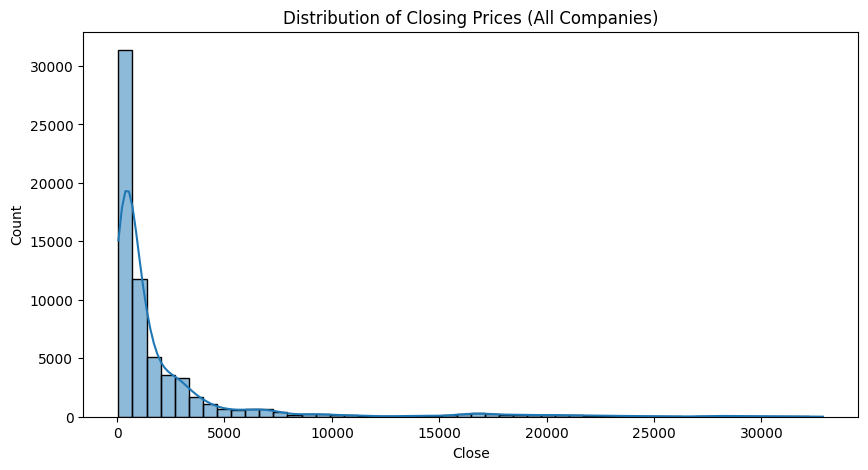

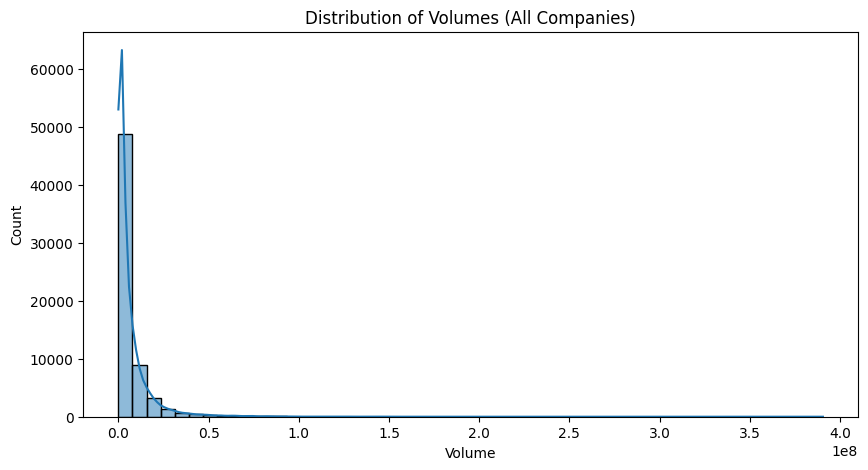

In [17]:
# --- Handle missing values ---
print("Missing values before cleaning:\n", data.isnull().sum())

# Drop rows missing critical fields
critical_cols = ["Date", "Open", "High", "Low", "Close", "Volume"]
data = data.dropna(subset=critical_cols)

# Fill non-critical numeric fields with median (if any left)
for col in data.columns:
    if data[col].dtype in ["float64", "int64"]:
        data[col] = data[col].fillna(data[col].median())

print("Missing values after cleaning:\n", data.isnull().sum())

# --- Handle duplicate dates per company ---
before_dupes = len(data)
data = data.drop_duplicates(subset=["Company", "Date"], keep="first")
after_dupes = len(data)
print(f"Removed {before_dupes - after_dupes} duplicate rows")

# --- Remove irrelevant columns ---
columns_to_keep = ["Date", "Company", "Open", "High", "Low", "Close", "Volume"]
data = data[columns_to_keep]

# --- Sort by company and date ---
data = data.sort_values(by=["Company", "Date"]).reset_index(drop=True)

# --- Quick sanity checks ---
print("Number of companies:", data["Company"].nunique())
print("Companies:", sorted(data["Company"].unique())[:10], "...")
print(data.describe())

# --- Distribution of closing prices ---
plt.figure(figsize=(10,5))
sns.histplot(data["Close"], bins=50, kde=True)
plt.title("Distribution of Closing Prices (All Companies)")
plt.show()

# --- Distribution of volumes ---
plt.figure(figsize=(10,5))
sns.histplot(data["Volume"], bins=50, kde=True)
plt.title("Distribution of Volumes (All Companies)")
plt.show()


# Cell 5: Save Preprocessed Data

In [18]:
# Save the preprocessed + cleaned dataset
output_file = os.path.join(PROCESSED_PATH, "nifty50_cleaned.csv")
data.to_csv(output_file, index=False)

print(f"Preprocessed data saved at: {output_file}")
print(f"Shape of cleaned dataset: {data.shape}")


Preprocessed data saved at: ../data/processed/nifty50_cleaned.csv
Shape of cleaned dataset: (64582, 7)
